In [1]:
!pip install -U imbalanced-learn
!pip install scikit-plot

In [2]:
%matplotlib inline
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

df = pd.read_csv('train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
df['price_range'].value_counts(normalize=True)

price_range
1    0.25
2    0.25
3    0.25
0    0.25
Name: proportion, dtype: float64

In [5]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
df = df[df['battery_power'].isnull() == False]

df['battery_power'] = df['battery_power'].fillna(df['battery_power'].median())
df.shape

(2000, 21)

In [7]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [8]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
df.skew()

battery_power    0.031898
blue             0.020016
clock_speed      0.178084
dual_sim        -0.038035
fc               1.019811
four_g          -0.086144
int_memory       0.057889
m_dep            0.089082
mobile_wt        0.006558
n_cores          0.003628
pc               0.017306
px_height        0.666271
px_width         0.014787
ram              0.006628
sc_h            -0.098884
sc_w             0.633787
talk_time        0.009512
three_g         -1.228142
touch_screen    -0.012009
wifi            -0.028024
price_range      0.000000
dtype: float64

In [10]:
df.columns.values

array(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'], dtype=object)

In [11]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [12]:
pd.crosstab(df['battery_power'] > 1000, df['price_range'], normalize='columns')

price_range,0,1,2,3
battery_power,,,,
False,0.452,0.338,0.374,0.23
True,0.548,0.662,0.626,0.77


In [13]:
df.skew()

battery_power    0.031898
blue             0.020016
clock_speed      0.178084
dual_sim        -0.038035
fc               1.019811
four_g          -0.086144
int_memory       0.057889
m_dep            0.089082
mobile_wt        0.006558
n_cores          0.003628
pc               0.017306
px_height        0.666271
px_width         0.014787
ram              0.006628
sc_h            -0.098884
sc_w             0.633787
talk_time        0.009512
three_g         -1.228142
touch_screen    -0.012009
wifi            -0.028024
price_range      0.000000
dtype: float64

In [14]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [15]:
df.shape

(2000, 21)

In [16]:
df.sample(1000).corr('kendall')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,-0.016995,-0.025159,-0.038659,0.044869,0.023681,-0.008032,0.037021,-0.012432,-0.037567,0.045902,-0.014955,-0.023850,-0.001680,-0.004102,-0.013647,0.045639,0.024364,0.022221,-0.004042,0.140330
blue,-0.016995,1.000000,0.022713,0.050633,-0.011975,0.044295,0.051678,-0.004083,-0.010510,-0.002530,-0.007464,-0.019799,-0.072062,0.015086,-0.001835,0.006073,-0.013996,-0.023930,0.013155,-0.021890,0.010865
clock_speed,-0.025159,0.022713,1.000000,-0.019083,-0.017890,-0.025214,0.009856,0.000916,-0.002630,-0.013500,-0.008070,-0.021871,-0.003547,-0.002765,-0.019202,-0.025548,0.002101,-0.024044,-0.010542,0.005121,-0.019986
dual_sim,-0.038659,0.050633,-0.019083,1.000000,-0.018674,0.018612,0.012947,0.008436,-0.005162,-0.020350,0.024136,-0.022937,0.000813,0.021777,-0.014129,-0.000682,-0.055738,-0.019130,-0.010770,-0.004081,0.006371
fc,0.044869,-0.011975,-0.017890,-0.018674,1.000000,-0.016745,-0.009671,0.024634,0.019605,-0.056831,0.533875,0.008202,-0.007978,0.030824,0.016531,0.003862,-0.010263,0.015753,-0.006873,0.004543,0.047101
four_g,0.023681,0.044295,-0.025214,0.018612,-0.016745,1.000000,0.003853,0.035425,0.013752,0.009329,0.004880,-0.019631,0.021649,0.030188,0.025980,0.027806,-0.013650,0.605635,-0.004752,-0.008310,0.043516
int_memory,-0.008032,0.051678,0.009856,0.012947,-0.009671,0.003853,1.000000,0.006286,-0.023453,-0.054367,-0.016453,0.025063,0.003826,0.020855,0.017870,-0.006931,-0.006756,-0.005674,-0.002533,0.078201,0.044175
m_dep,0.037021,-0.004083,0.000916,0.008436,0.024634,0.035425,0.006286,1.000000,0.010567,-0.002986,0.040633,0.031791,0.041741,0.009494,-0.035032,-0.030445,0.006215,-0.006236,0.008543,0.001658,0.017687
mobile_wt,-0.012432,-0.010510,-0.002630,-0.005162,0.019605,0.013752,-0.023453,0.010567,1.000000,-0.000367,0.017352,0.014506,0.008370,-0.006400,-0.027740,-0.002732,0.028507,0.040517,0.002238,0.012881,-0.020276
n_cores,-0.037567,-0.002530,-0.013500,-0.020350,-0.056831,0.009329,-0.054367,-0.002986,-0.000367,1.000000,-0.035585,-0.004722,0.022707,-0.005674,-0.006046,0.038051,0.020244,-0.008169,-0.000902,-0.005729,-0.009443


In [17]:
df['n_cores'].value_counts()
#df['n_cores'].sample(5)

n_cores
4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: count, dtype: int64

In [18]:
df2 = df[(df['n_cores'] < 3) | (df['px_width'] < 1000)]
df2.shape

(977, 21)

In [19]:
df.columns.values
train_cols = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']
df[train_cols].describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000


In [20]:
df[~(df['n_cores']==3)]['n_cores'].value_counts()

n_cores
4    274
7    259
8    256
2    247
5    246
1    242
6    230
Name: count, dtype: int64

array([[<Axes: title={'center': 'battery_power'}>,
        <Axes: title={'center': 'blue'}>,
        <Axes: title={'center': 'clock_speed'}>,
        <Axes: title={'center': 'dual_sim'}>,
        <Axes: title={'center': 'fc'}>],
       [<Axes: title={'center': 'four_g'}>,
        <Axes: title={'center': 'int_memory'}>,
        <Axes: title={'center': 'm_dep'}>,
        <Axes: title={'center': 'mobile_wt'}>,
        <Axes: title={'center': 'n_cores'}>],
       [<Axes: title={'center': 'pc'}>,
        <Axes: title={'center': 'px_height'}>,
        <Axes: title={'center': 'px_width'}>,
        <Axes: title={'center': 'ram'}>,
        <Axes: title={'center': 'sc_h'}>],
       [<Axes: title={'center': 'sc_w'}>,
        <Axes: title={'center': 'talk_time'}>,
        <Axes: title={'center': 'three_g'}>,
        <Axes: title={'center': 'touch_screen'}>,
        <Axes: title={'center': 'wifi'}>],
       [<Axes: title={'center': 'price_range'}>, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >]], 

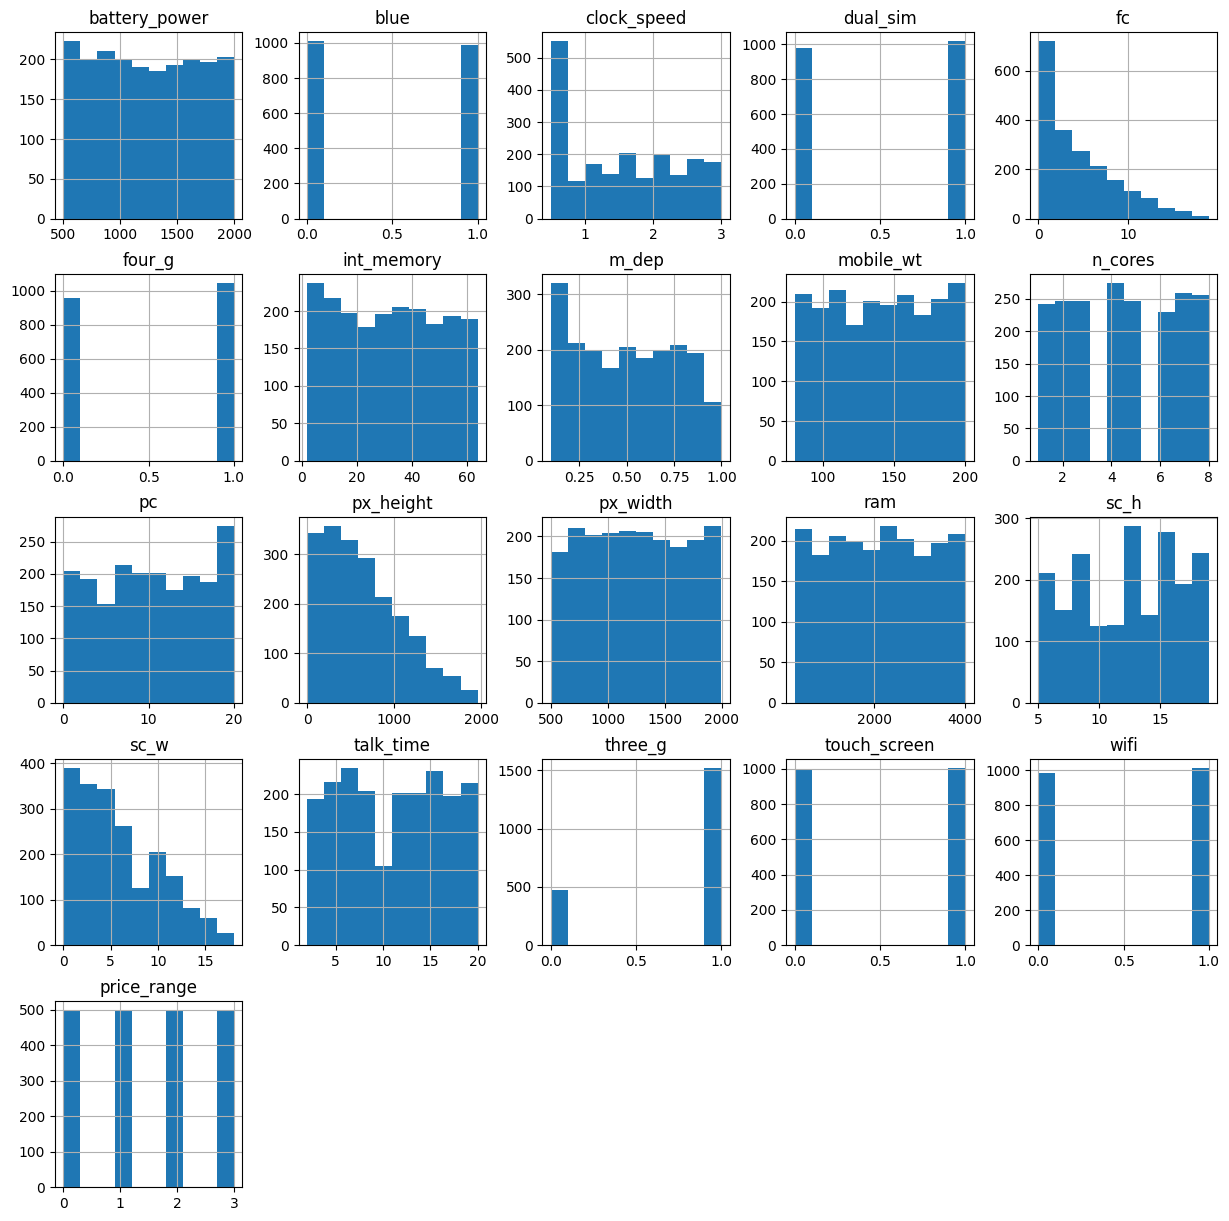

In [21]:
df.hist(figsize=(15,15))

In [22]:
~df.columns.isin(['price_range'])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False])

In [23]:
train_cols = df.columns[~df.columns.isin(['price_range'])]
train_cols

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [24]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [25]:
def bin_age(age):
    if age < 35:
        return 0
    elif age < 50:
        return 1
    elif age < 65:
        return 2
    else:
        return 3
    
assert bin_age(30) == 0
assert bin_age(78) == 3

In [26]:
df2  = pd.DataFrame([[2, 3]], columns =['sc_w', 'sc_h'])
df2.head()

def calc_screen(df):
    df['screen_dimensions'] =  df['sc_w'] * df['sc_h']

calc_screen(df2)
assert df2['screen_dimensions'].values[0] == 6

In [27]:
#screen_dimensions = sc_h * sc_w
df['screen_dimensions'] = df['sc_w'] * df['sc_w']
df[['sc_h', 'sc_w', 'screen_dimensions']].head()

,sc_h,sc_w,screen_dimensions
0,9,7,49
1,17,3,9
2,11,2,4
3,16,8,64
4,8,2,4


In [28]:
df[df['n_cores'] == 2].head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,screen_dimensions
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,49
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,4
15,775,0,1.0,0,3,0,46,0.7,159,2,16,862,1864,568,17,15,11,1,1,1,0,225
21,1709,1,2.1,0,1,0,13,1.0,156,2,2,974,1385,3283,17,1,15,1,0,0,3,1
28,1453,0,1.6,1,12,1,52,0.3,96,2,18,187,1311,2373,10,1,10,1,1,1,2,1


In [29]:
df[(df['n_cores'] == 2) & (df['int_memory'] < 8)].shape

(20, 22)

<Axes: ylabel='px_width'>

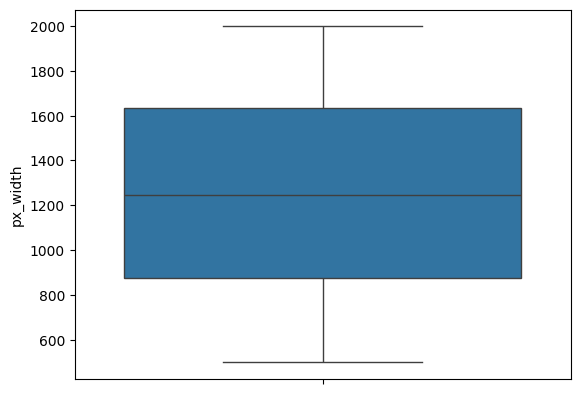

In [30]:
sns.boxplot(df['px_width'])

In [31]:
import sklearn
from sklearn.model_selection import train_test_split
df_x = df[train_cols]
X, test, y, y_test = sklearn.model_selection.train_test_split(df_x, df['price_range'], stratify=df['price_range'], 
                                                              test_size=.1)
pd.Series(y_test).value_counts()

price_range
2    50
1    50
0    50
3    50
Name: count, dtype: int64

In [32]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=train_cols)
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.471756,-1.0,-0.884873,0.981286,-0.301350,0.962910,-1.220480,-1.045827,0.103595,-1.542140,0.341599,1.952146,1.447687,-1.009633,-0.535229,-1.309758,-0.558789,0.555959,0.995565,0.986754
1,-0.765947,1.0,-1.006598,-1.019071,-0.301350,-1.038519,-1.606814,-0.699272,-0.178851,1.094414,-0.154271,0.062650,0.071132,1.189862,-0.061691,1.218091,0.723210,-1.798692,-1.004454,0.986754
2,-0.062243,1.0,-1.250048,-1.019071,-0.992930,-1.038519,-0.889336,-0.006161,-0.913209,0.215563,-1.641880,-0.943737,-0.014039,0.532510,-0.061691,-0.620344,-0.375646,-1.798692,-1.004454,0.986754
3,1.118892,-1.0,0.332377,0.981286,2.695500,-1.038519,0.104096,-1.392383,-0.009383,-1.102714,1.168049,-1.116325,-0.870358,0.247750,1.122152,2.137309,1.455781,0.555959,-1.004454,0.986754
4,-1.286370,1.0,-1.128323,0.981286,2.003919,-1.038519,1.594243,-1.392383,1.515823,0.215563,1.663918,0.172478,-0.292573,-0.616701,0.411846,0.988287,1.638923,0.555959,-1.004454,0.986754


In [33]:
test = scaler.transform(test)
test = pd.DataFrame(test, columns=train_cols)
test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.725180,-1.0,-1.250048,0.981286,1.312338,0.962910,-1.551623,-0.006161,-0.178851,-1.102714,0.506889,0.533343,1.281948,-0.315299,0.175077,1.447896,-0.192503,0.555959,0.995565,-1.013423
1,1.139256,1.0,-0.641423,-1.019071,-0.762404,0.962910,-0.668573,-0.006161,-0.800231,1.533840,-1.146010,-1.297878,-1.234063,-0.849687,1.358921,0.298873,0.540067,0.555959,-1.004454,-1.013423
2,-0.401650,1.0,1.184452,-1.019071,-0.992930,0.962910,-0.061476,1.380061,-1.280389,0.654988,0.011019,-0.789081,-0.734544,-1.075276,0.885383,0.069069,-1.108216,0.555959,0.995565,-1.013423
3,1.510341,-1.0,-1.250048,-1.019071,1.081811,0.962910,-0.116667,1.726616,-0.828476,-1.102714,1.498628,-1.136497,-0.479029,0.758099,1.595689,2.596918,1.089495,0.555959,-1.004454,0.986754
4,-0.191218,-1.0,-1.250048,-1.019071,0.390231,-1.038519,1.594243,-1.392383,-1.449856,1.094414,-0.154271,1.270762,0.018188,-0.303280,0.885383,0.069069,0.356925,-1.798692,0.995565,0.986754


In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
df['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

In [36]:
len(train_cols)

20

In [37]:
def build_model():  
    model = models.Sequential()
    model.add(layers.Dense(20, activation='relu', input_shape=(X.shape[1],)))
    #model.add(layers.Dropout(rate=.3))
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dense(4, activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[tf.metrics.Recall(), 'accuracy'])      
    return model
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                420       
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 4)                 84        
                                                                 
Total params: 924
Trainable params: 924
Non-trainable params: 0
_________________________________________________________________


In [38]:
y

1075    1
442     3
135     2
1196    2
1961    0
1903    2
428     1
1486    1
594     2
1784    2
1475    1
1797    0
568     3
590     2
566     0
72      0
608     2
1507    2
646     0
1575    2
1870    2
102     1
1640    2
824     3
218     1
382     2
422     2
1788    1
1913    0
882     2
1004    2
676     3
980     0
215     3
1818    0
403     2
1363    0
1283    2
797     0
198     1
1024    0
275     2
1811    1
1577    1
1796    1
1396    3
1142    2
1991    3
22      1
1290    0
1397    0
1208    1
1137    0
514     1
1294    0
633     1
1951    0
1649    1
1217    3
484     1
1566    0
1332    1
8       0
1073    0
1760    1
1800    0
917     0
1096    3
1359    1
1874    2
630     0
1409    0
1762    0
1097    1
487     2
1192    2
1135    1
1963    1
1138    2
261     1
1795    0
1911    0
121     3
846     0
1955    3
510     3
115     3
875     0
976     3
1808    0
66      3
360     1
1166    0
1576    0
1226    3
1426    1
1702    2
91      2
10      3
1773    0


In [39]:
import lightgbm as lgb
model =  lgb.LGBMClassifier(n_jobs=7, #paralleization 
                            learning_rate=0.1,
                            max_bin=410, #more the better
                            n_estimators=500, #more the better
                            num_leaves=500, #more the better
                            reg_alpha=  0.5, #to handle overfitting
                            reg_lambda= 0.5, #to handle overfitting
                            is_unbalance=True,  # will discuss this one. 
                            verbose=1,
                          #  scale_pos_weight=scale_pos_weight # will discuss this one. 
                            )
model.fit(X, y)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000661 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1986
[LightGBM] [Info] Number of data points in the train set: 1800, number of used features: 20
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

LGBMClassifier(is_unbalance=True, max_bin=410, n_estimators=500, n_jobs=7,
               num_leaves=500, reg_alpha=0.5, reg_lambda=0.5, verbose=1)

In [40]:
from scikeras.wrappers  import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
model = KerasClassifier(build_fn=build_model, epochs=50, batch_size=8, verbose=1)
#callbacks = [EarlyStopping(monitor='loss', patience=1,restore_best_weights=True)]
y_encoded = one_hot_labels = tf.keras.utils.to_categorical(y, num_classes=y.nunique())
modelfit = model.fit(X, y_encoded)

C:\Users\cappr\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50
225/225 [==============================] - 1s 3ms/step - loss: 1.3345 - recall_1: 0.0383 - accuracy: 0.3761
Epoch 2/50
225/225 [==============================] - 1s 2ms/step - loss: 0.9690 - recall_1: 0.2556 - accuracy: 0.6178
Epoch 3/50
225/225 [==============================] - 1s 2ms/step - loss: 0.6313 - recall_1: 0.5722 - accuracy: 0.7706
Epoch 4/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4383 - recall_1: 0.7933 - accuracy: 0.8594
Epoch 5/50
225/225 [==============================] - 0s 2ms/step - loss: 0.3320 - recall_1: 0.8939 - accuracy: 0.9039
Epoch 6/50
225/225 [==============================] - 0s 2ms/step - loss: 0.2697 - recall_1: 0.9094 - accuracy: 0.9122
Epoch 7/50
225/225 [==============================] - 0s 2ms/step - loss: 0.2268 - recall_1: 0.9250 - accuracy: 0.9250
Epoch 8/50
225/225 [==============================] - 0s 2ms/step - loss: 0.1994 - recall_1: 0.9272 - accuracy: 0.9272
Epoch 9/50
225/225 [============================

In [41]:
"""
def compute_avg(test):
    total = 0
    for t in test:
        total+= t
    return total/len(test)

test = [6, 4, 8]
assert compute_avg(test) == 6
"""

'\ndef compute_avg(test):\n    total = 0\n    for t in test:\n        total+= t\n    return total/len(test)\n\ntest = [6, 4, 8]\nassert compute_avg(test) == 6\n'

In [42]:
train_cols

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [43]:
test.shape

(200, 20)

25/25 [==============================] - 0s 1ms/step
prediction 2
25/25 [==============================] - 0s 873us/step
prediction_prob [7.8888991e-21 8.2024690e-06 9.9999177e-01 2.1212886e-10]


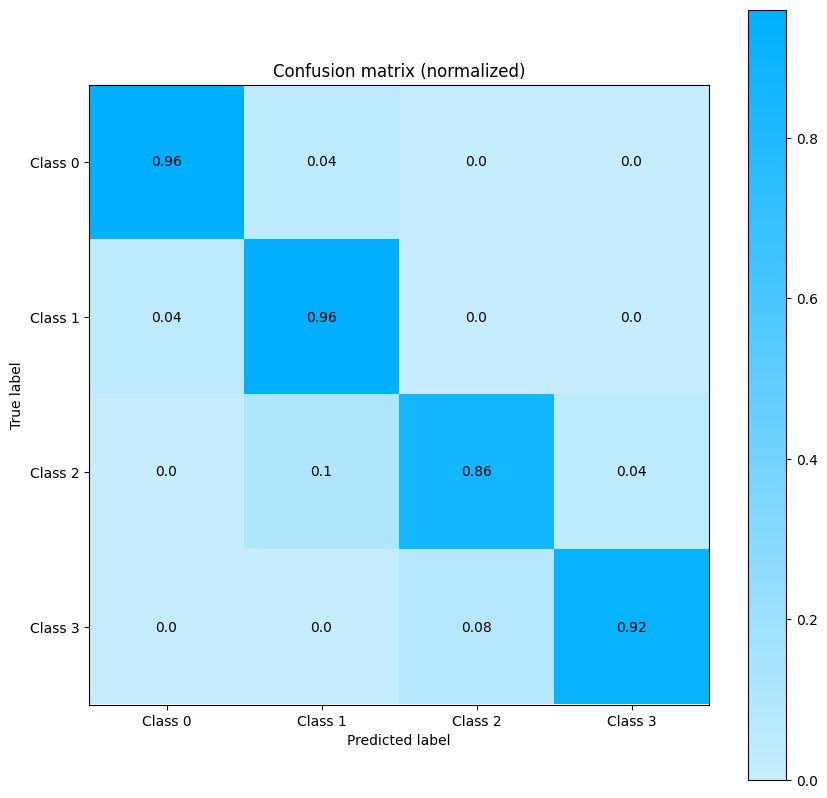

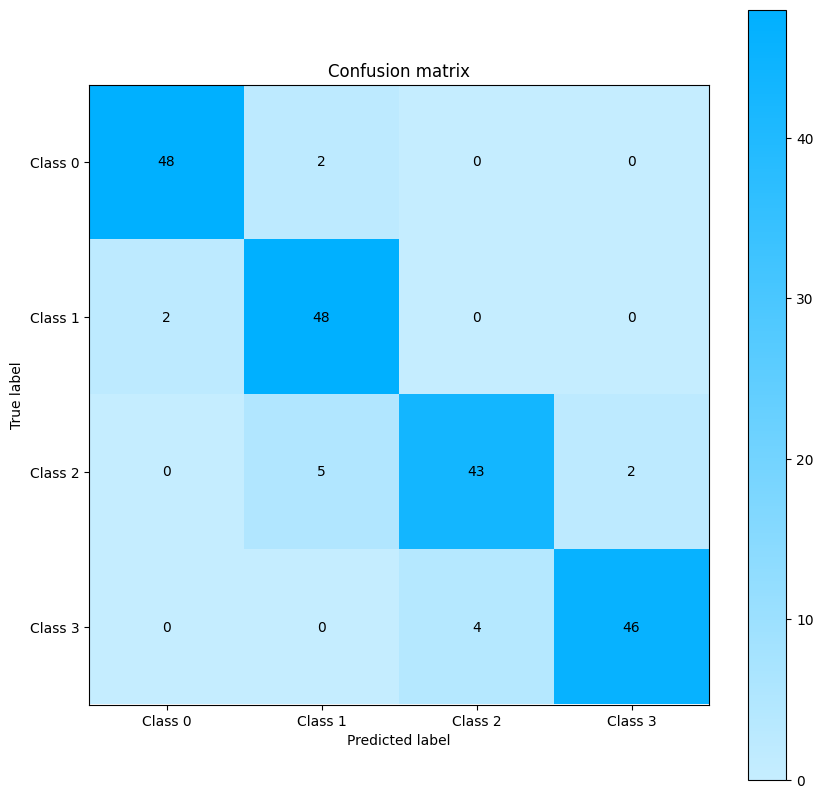

0.925
0.9264885557704706
0.9249999999999999
0.9249147906585314


In [44]:
from sklearn_evaluation import plot
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
plt.rcParams['figure.figsize'] = [10, 10]

pre = model.predict(test)
pre = tf.argmax(pre, axis=1).numpy()
print("prediction", pre[0])
predictions = model.predict_proba(test)
print("prediction_prob", predictions[0])
predicted_classes = tf.argmax(predictions, axis=1)
            
plot.confusion_matrix(y_test, pre, normalize=True,)
plt.show()
plot.confusion_matrix(y_test, pre, normalize=False,)
plt.show()


print(accuracy_score(y_test, pre))
print(precision_score(y_test, pre, average='macro'))
print(recall_score(y_test, pre,average='macro'))
print(f1_score(y_test, pre,average='macro'))


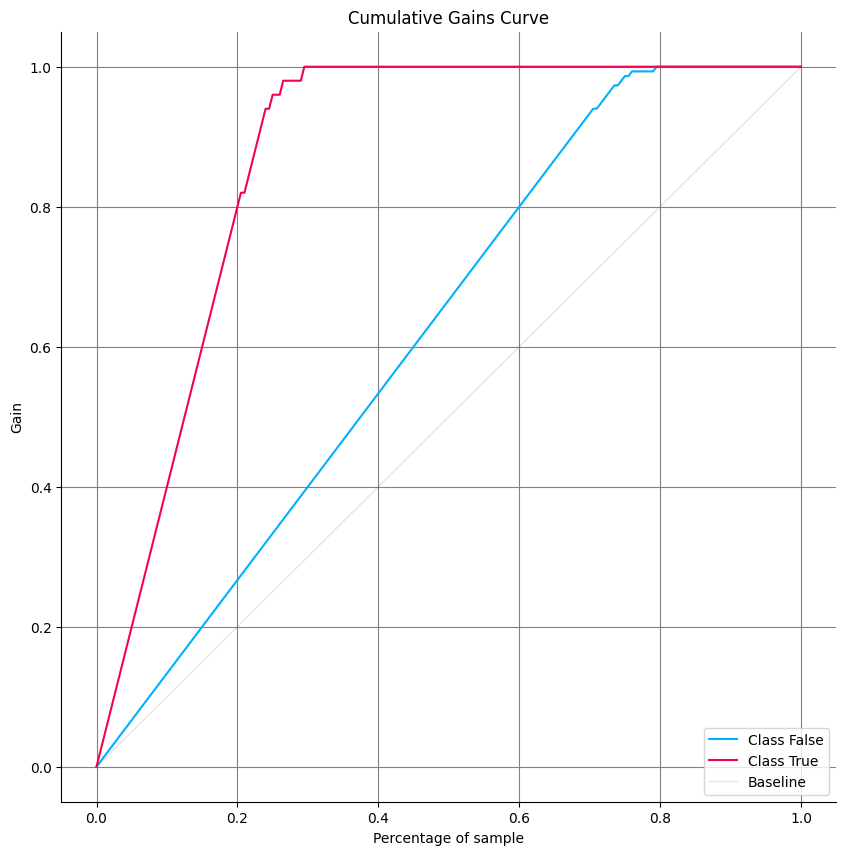

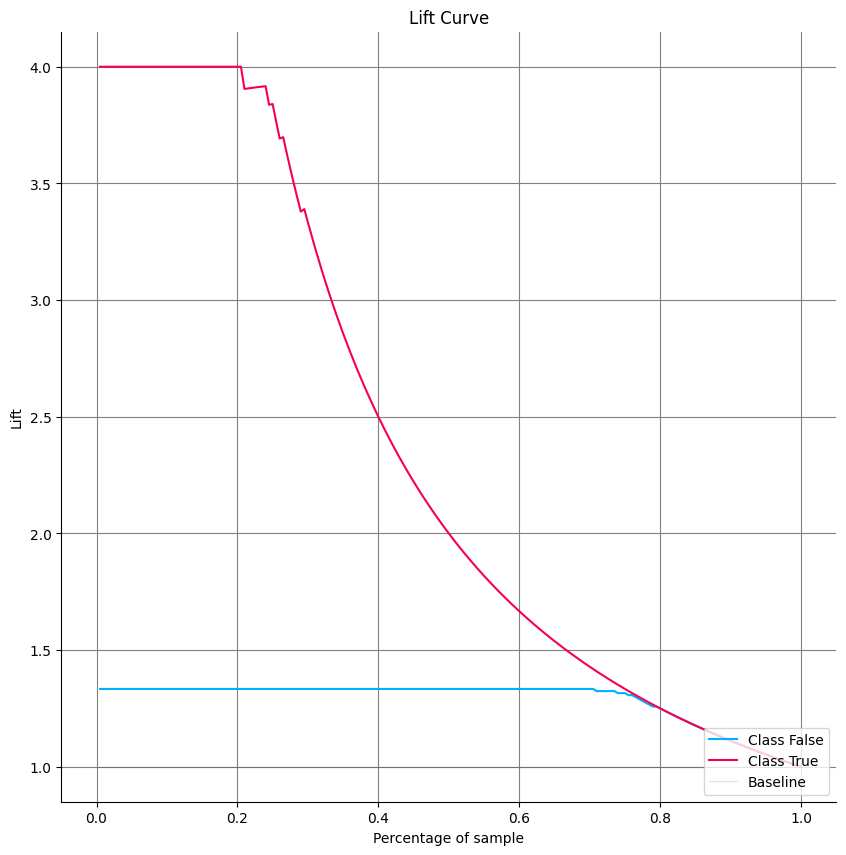

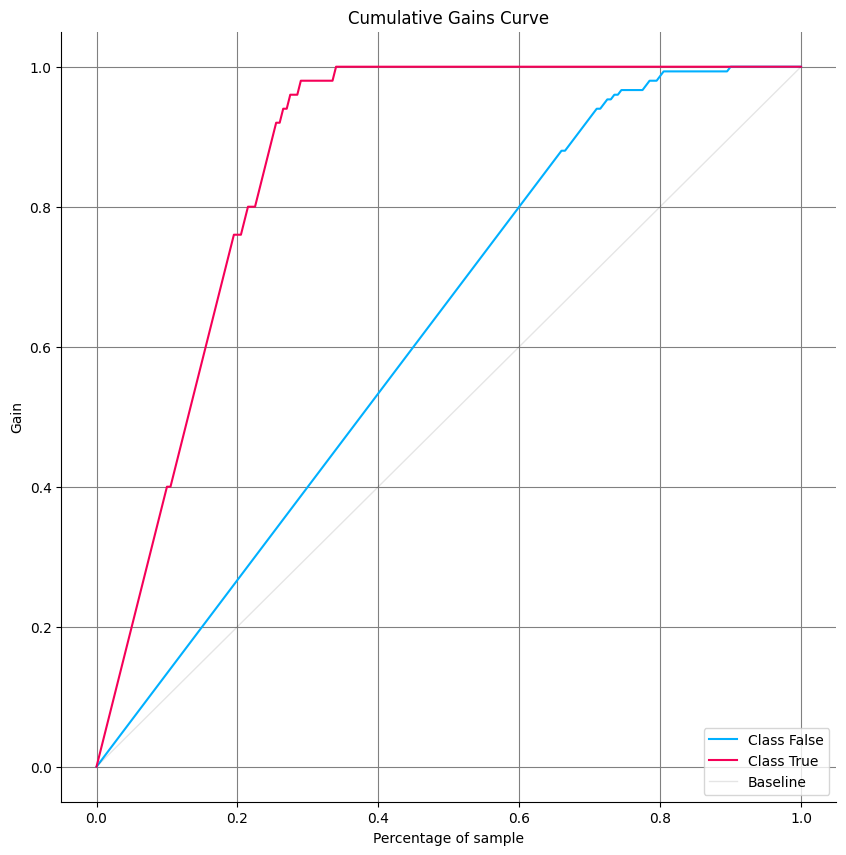

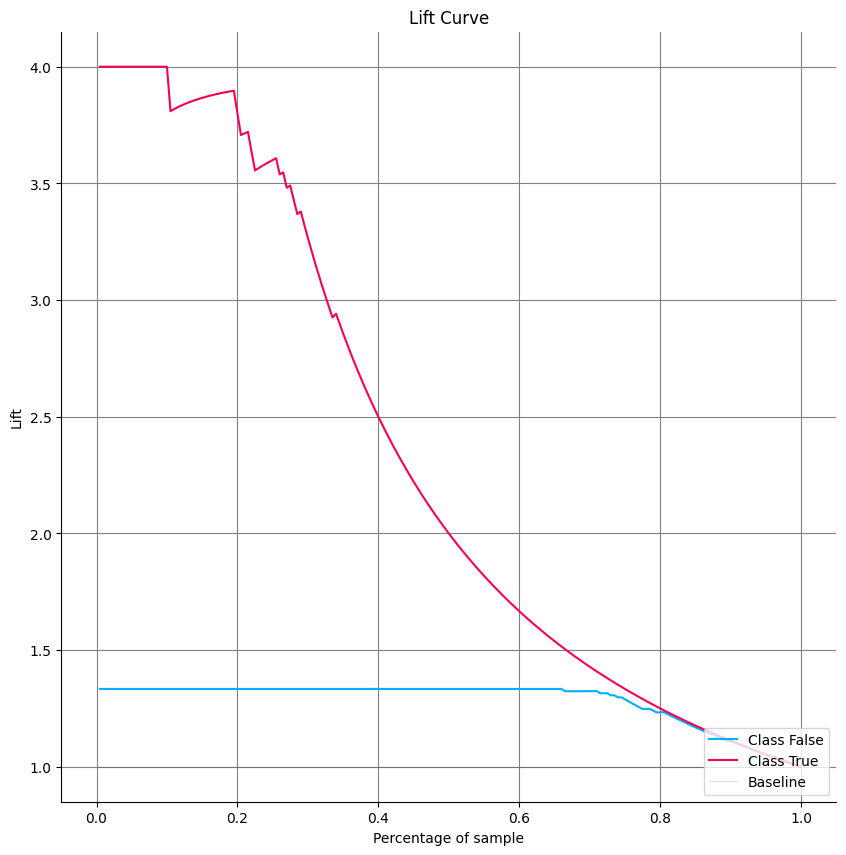

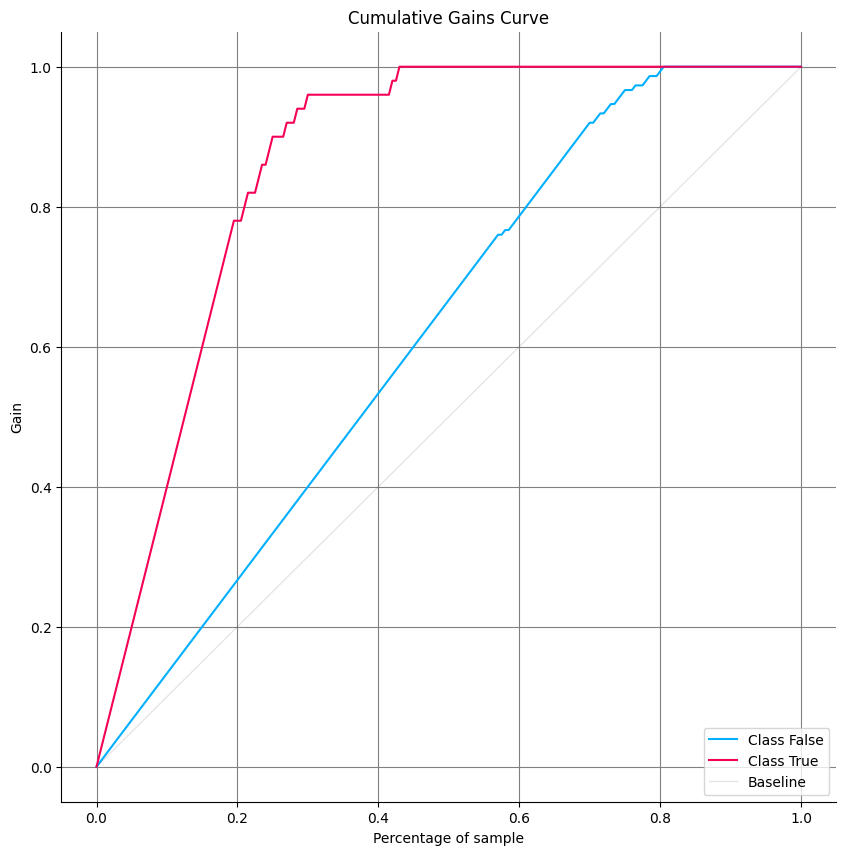

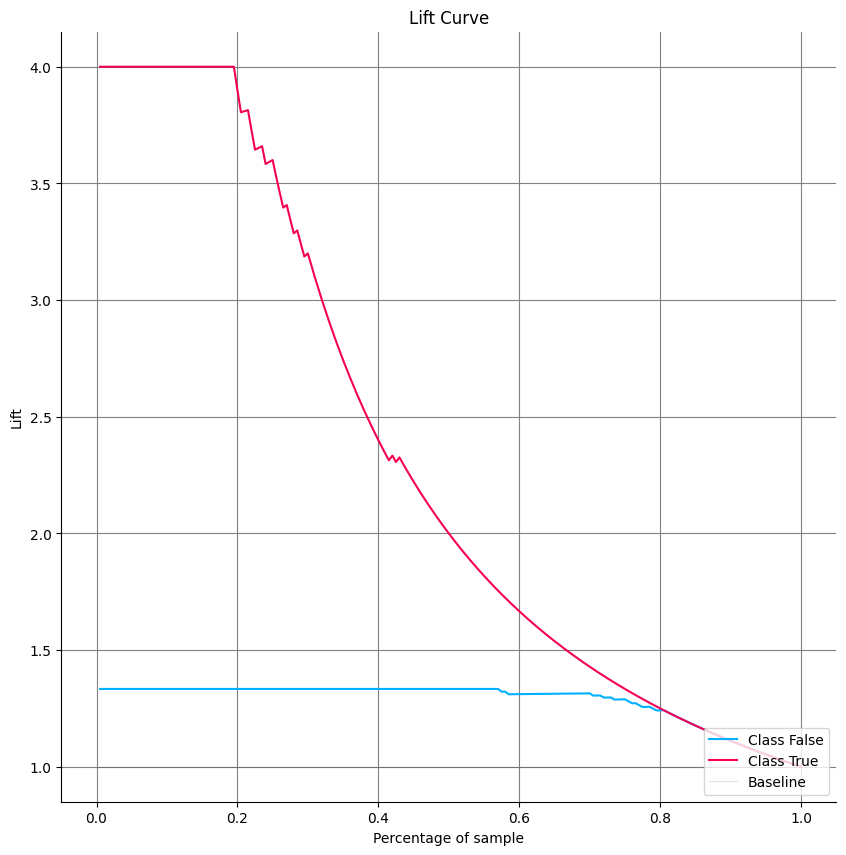

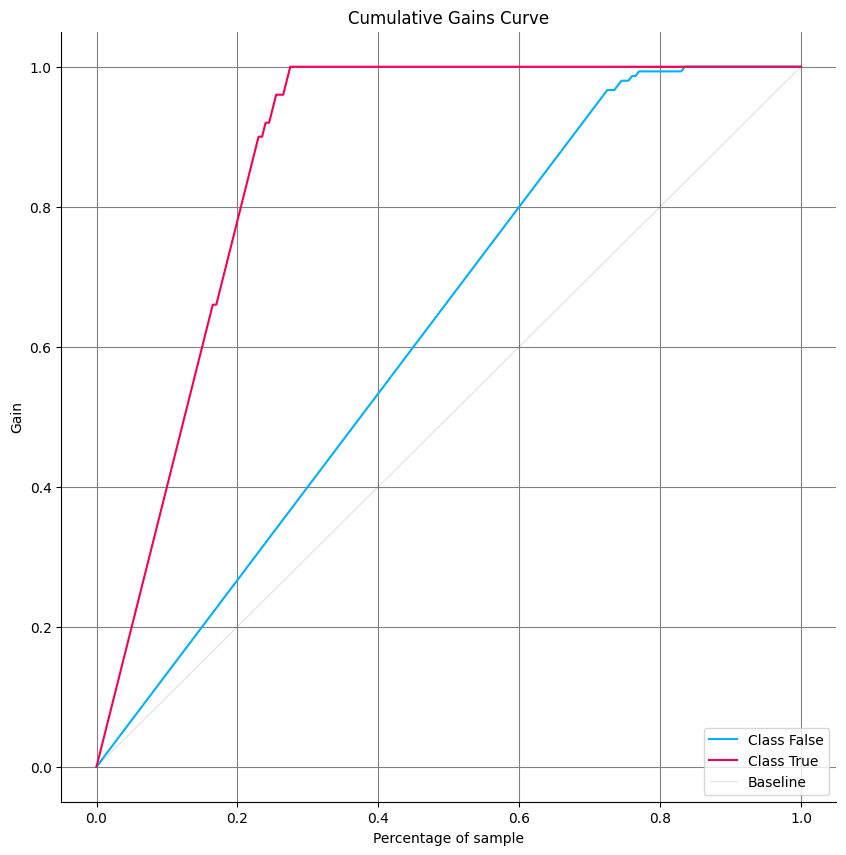

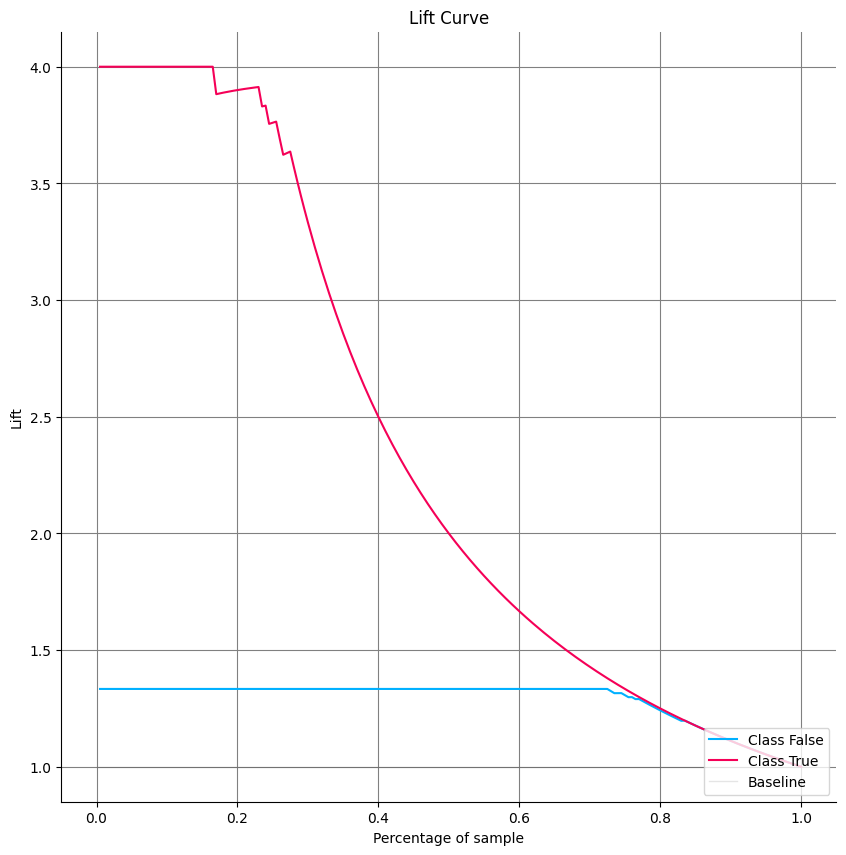

In [45]:
for i in df['price_range'].sort_values().unique():
    one_y = y_test == i
    one_predictions = predictions[:, i]
    prob_predictions = [[1 - p, p] for p in one_predictions]
    plot.cumulative_gain(one_y, prob_predictions)
    plt.show()

    plot.cumulative_gain_lift_curve.lift_curve(one_y, prob_predictions)
    plt.show()
